<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/PCA_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Project-Hand Written Digits(small size)

### The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

## Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset

In [52]:
from sklearn.datasets import load_digits

In [53]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [54]:
data = digits.data
label = digits.target

In [55]:
label.shape

(1797,)

In [56]:
data.shape

(1797, 64)

## Image a sample

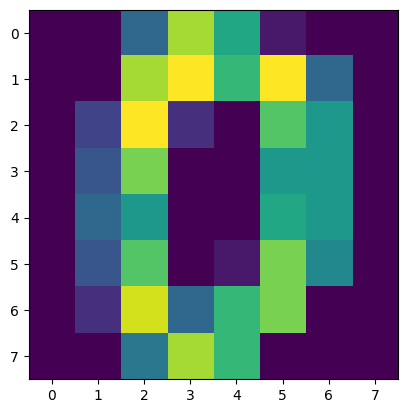

In [85]:
# take a sample image to view
#Remember image is in the form of numpy array
sample = data[0, :].reshape(8,8)
plt.imshow(sample);

## PCA with 2 components

In [58]:
from sklearn.decomposition import PCA

In [74]:
#Remember image is in the form of numpy array
pca_digits = PCA()
pca_digits2 = PCA(2) # we need 2 principal components.
PC_dig1 = pca_digits.fit_transform(data)
PC_dig2 = pca_digits2.fit_transform(data)

PC_dig1.shape

(1797, 64)

In [75]:
PC_dig2.shape

(1797, 2)

## Scatter Plot

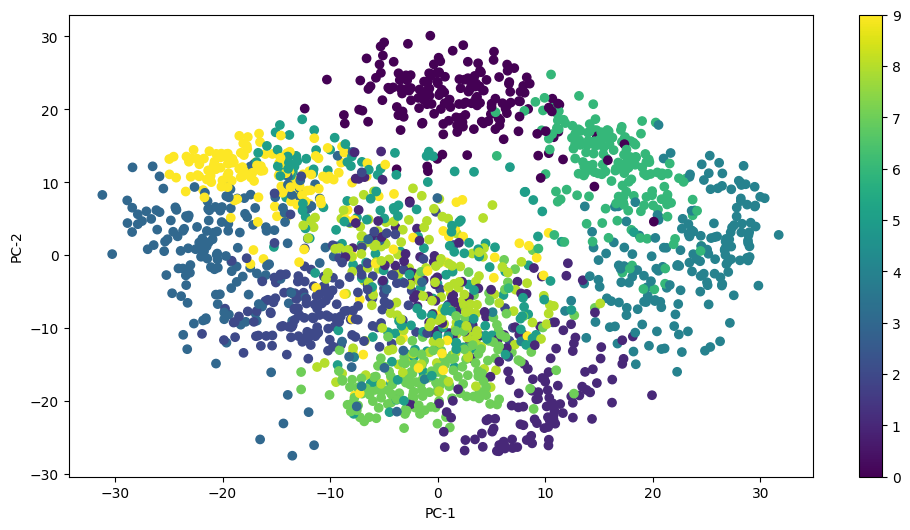

In [78]:
# plt setup
plt.figure(figsize=(12,6))
plt.scatter(PC_dig2[:,0],PC_dig2[:,1],c = label)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

[]

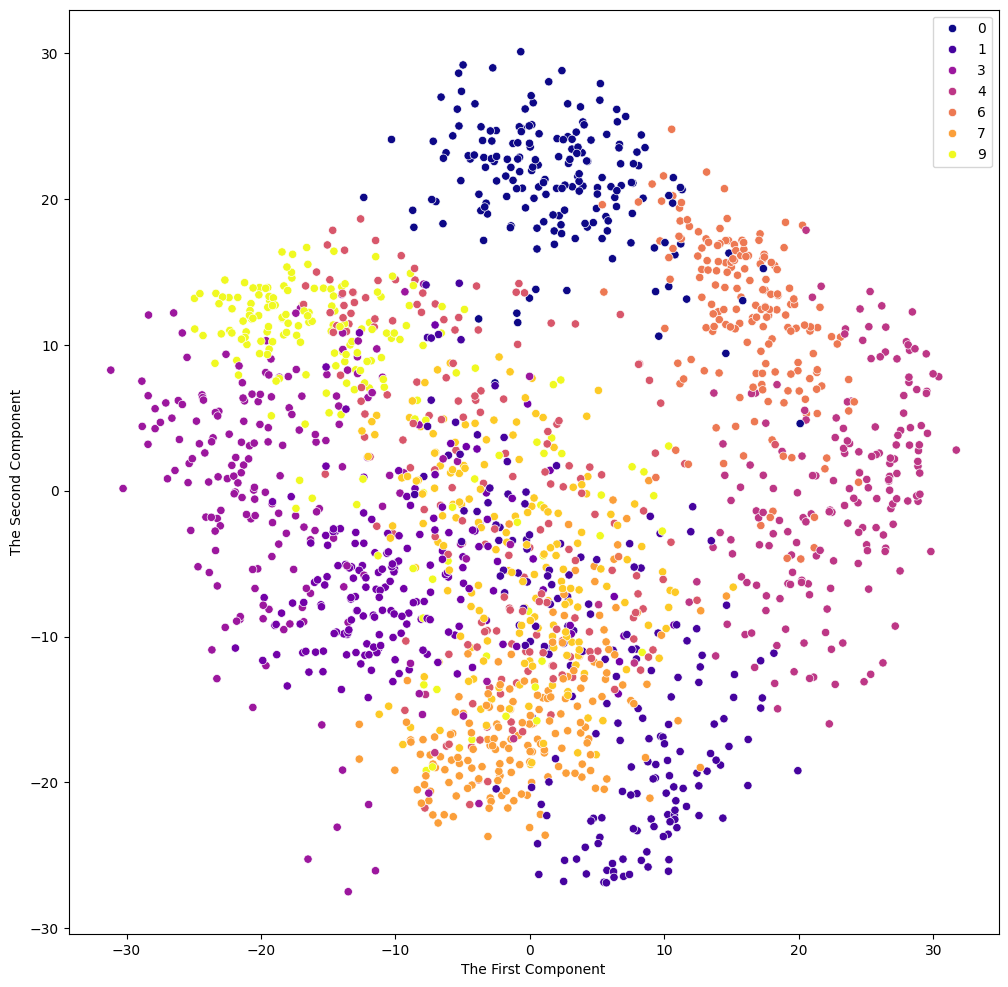

In [79]:
# sns setup
plt.figure(figsize=(12,12))
sns.scatterplot(x=PC_dig2[:,0],y=PC_dig2[:,1],hue=digits['target'],palette='plasma')
plt.xlabel('The First Component')
plt.ylabel('The Second Component')
plt.plot()

## Elbow Plot

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

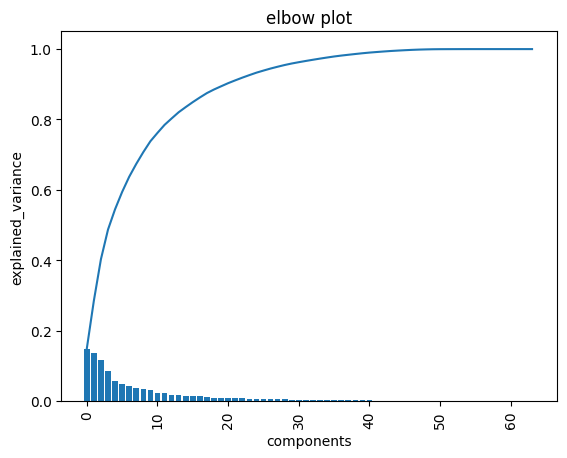

In [80]:
plt.bar(np.arange(64), pca_digits.explained_variance_ratio_ )
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [83]:
total_var = np.cumsum(pca_digits.explained_variance_ratio_) * 100

for i in [0, 1, 2, 3, 4, 9, 19, 29, 39]:
    print("pca_digits {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

pca_digits  1, explained var: 14.89
pca_digits  2, explained var: 28.51
pca_digits  3, explained var: 40.30
pca_digits  4, explained var: 48.71
pca_digits  5, explained var: 54.50
pca_digits 10, explained var: 73.82
pca_digits 20, explained var: 89.43
pca_digits 30, explained var: 95.91
pca_digits 40, explained var: 98.82


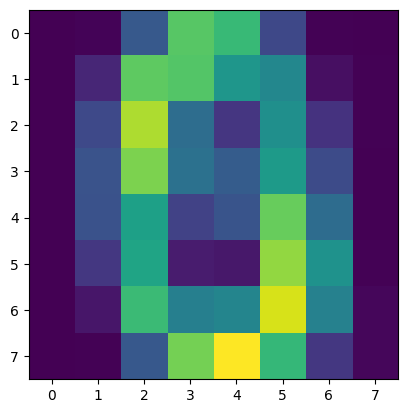

In [86]:
im = pca_digits2.inverse_transform(PC_dig2)
image_sample = im[0,:].reshape(8,8)
plt.imshow(image_sample)